In [5]:
# DO NOT MODIFY: Import library used to run notebook
import geotiledsaga as gts

In [6]:
# Set other import variables
download_list = 'urls'
shapefile = 'DE'
parameters = ['slope','hillshade']
num_tiles = 4

# Update and set working directory
data_folder = '/media/volume/geotiled-saga/de_30m'
gts.set_working_directory(data_folder)

In [7]:
# Create a text file with download URLs from a shape file
gts.fetch_dem(shapefile=shapefile, txt_file=download_list, dataset="30m")

# Download files from the created text file
gts.download_files(download_list=download_list, download_folder='dem_tiles')

Downloading: 100%|█████████████████████████████████████████████| 1.38M/1.38M [00:00<00:00, 2.04MB/s]
Downloading: 100%|███████████████████████████████████████████████| 150M/150M [00:02<00:00, 64.0MB/s]


In [8]:
# Build mosaic from DEMs
gts.build_mosaic(input_folder='dem_tiles', output_file='mosaic.tif', description='Elevation', cleanup=False)

# Reproject the mosaic to Projected Coordinate System (PCS) EPSG:26918 - NAD83 UTM Zone 18N
gts.reproject(input_file='mosaic.tif', output_file='elevation.tif', projection='EPSG:26918', cleanup=False)

In [9]:
# Crop reprojected mosaic into specified number of intermediary elevation tiles
gts.crop_into_tiles(input_file='elevation.tif', output_folder='elevation_tiles', num_tiles=num_tiles)

In [10]:
# Run GEOtiled to compute all terrain parameters for each cropped tile
gts.compute_geotiled(input_folder='elevation_tiles', parameter_list=parameters, num_processes=4, cleanup=False)

In [11]:
# Build mosaics for each of the computed parameters
gts.build_mosaic_buffer(input_folder='slope_tiles', output_file='slope.tif', cleanup=False)
gts.build_mosaic_buffer(input_folder='hillshade_tiles', output_file='hillshade.tif', cleanup=False)

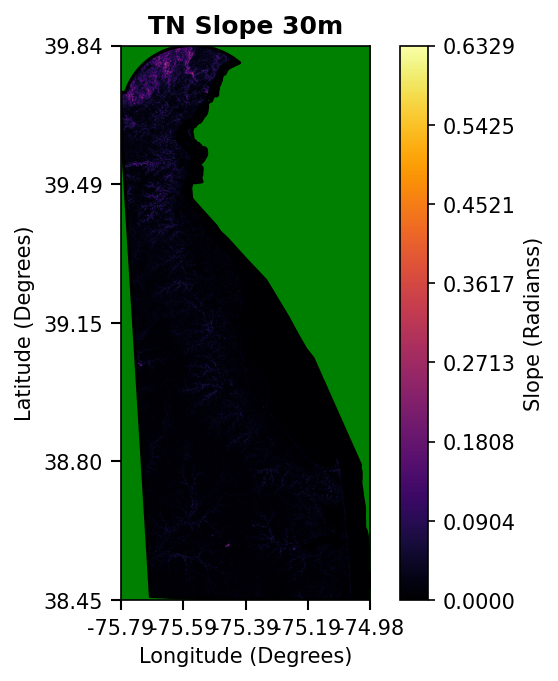

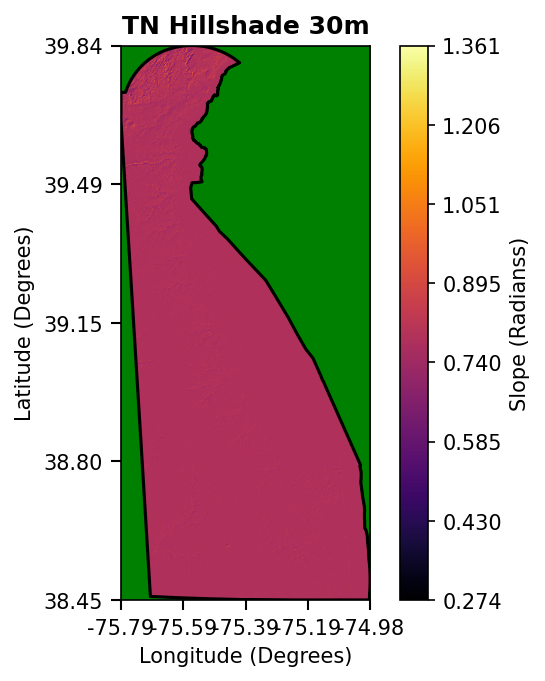

In [12]:
# Visualize the parameters
slp_img = gts.generate_img(tif='slope.tif', downsample=5, shp_files=shapefile, crop_shp=True, reproject_gcs=True, title="TN Slope 30m", zunit="Radians", xyunit="Degree", ztype="Slope")
hld_img = gts.generate_img(tif='hillshade.tif', downsample=5, shp_files=shapefile, crop_shp=True, reproject_gcs=True, title="TN Hillshade 30m", zunit="Radians", xyunit="Degree", ztype="Slope")

Fin